### Name: Toh Kien Yu
### Class: DAAA/FT/1B/05
### Admin No: 2222291

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

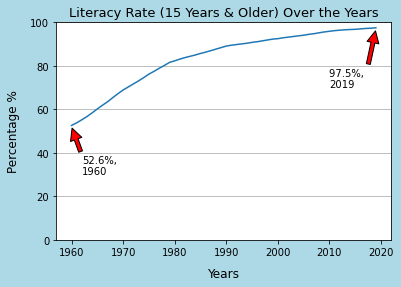

In [12]:
#Literacy Rate Line Chart
data = np.genfromtxt ('./Datasets/literacy-rate-annual.csv', dtype=[('year','i4'),('level_1','U50'),('value','f8')], delimiter=",", names=True)

x_axis = data['year']
y_axis = data['value']

#Extract rows containing year 1960 and 2020
startYearPct = data[data['year'] == 1960]
endYearPct = data[data['year'] == 2019]
# print(startYearPct)
# print(endYearPct)

#Extract Percentage of Literacy Rate in Year 1960 and 2019
startYearPct_final = startYearPct['value']
endYearPct_final = endYearPct['value']

#Plotting the graph
fig, ax = plt.subplots()
fig.set_facecolor("lightblue")
plt.title("Literacy Rate (15 Years & Older) Over the Years",fontsize = 13)
plt.xlabel("Years",fontsize= 12,labelpad=10)
plt.ylabel("Percentage %",fontsize= 12, labelpad=10)
plt.ylim(0,100)
ax.annotate("52.6%,\n1960", xy = (1960,52),xytext = (1962,30), arrowprops=dict(facecolor="red", shrink=0.05))
ax.annotate("97.5%, \n2019", xy = (2019,97),xytext = (2010,70), arrowprops=dict(facecolor="red", shrink=0.05))
plt.plot(x_axis, y_axis)
plt.grid(axis="y")
plt.show()

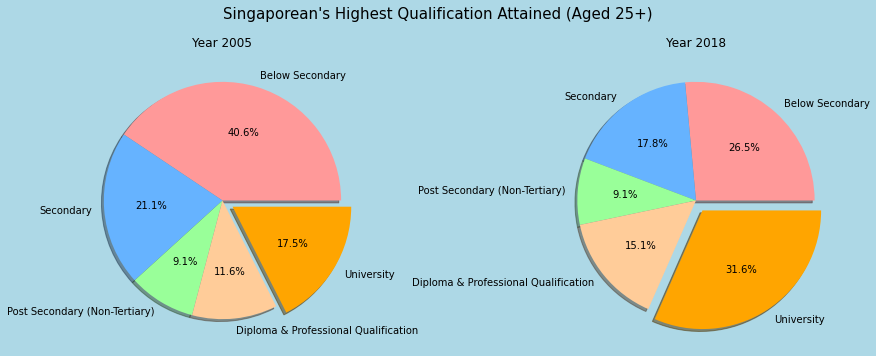

In [3]:
#Pie Chart on Singaporeans's highest qualification attained
data = np.genfromtxt ('./Datasets/singapore-residents-aged-25-years-over-by-hqa-and-sex-annual.csv', dtype=[('year','i4'),('level_1','U50'),('value','i8')], delimiter=",", names=True)

#Extract rows for year 2005 and 2018
data2005 = data[data['year'] == 2005]
data2018 = data[data['year'] == 2018]

#Extract rows with required keywords only
data2005_final = data2005[np.isin(data2005['level_1'],['Total - Below Secondary','Total - Secondary','Total - Post Secondary (Non-Tertiary)', 'Total - Diploma & Professional Qualification', 'Total - University'])]
data2018_final = data2018[np.isin(data2018['level_1'],['Total - Below Secondary','Total - Secondary','Total - Post Secondary (Non-Tertiary)', 'Total - Diploma & Professional Qualification', 'Total - University'])]


#Extract labels of year 2005 and 2018
labels2005 = data2005_final['level_1']
labels2018 = data2018_final['level_1']

labels2005_final = list(map(lambda x: x[8:],labels2005))
labels2018_final = list(map(lambda x: x[8:],labels2018))

#Extract the values
values2005 = data2005_final['value']
values2018 = data2018_final['value']

#Plotting the graph
fig = plt.figure(figsize = (12,5))
fig.set_facecolor("lightblue")
fig.suptitle('Singaporean\'s Highest Qualification Attained (Aged 25+)', fontsize = 15)

ax1 = fig.add_subplot(1,2,1)
colors1 = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99" , "orange"]
ax1.set_title('Year 2005',fontsize= 12)
ax1.pie(values2005,explode = (0,0,0,0,0.1), colors = colors1,labels = labels2005_final, shadow = True, autopct='%1.1f%%')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Year 2018', fontsize= 12)
ax2.pie(values2018,explode = (0,0,0,0,0.1),colors = colors1, labels = labels2018_final, shadow = True, autopct='%1.1f%%')
# plt.legend(bbox_to_anchor=(1.0, 0.7, 0.5, 0.5))
plt.tight_layout()
plt.show()





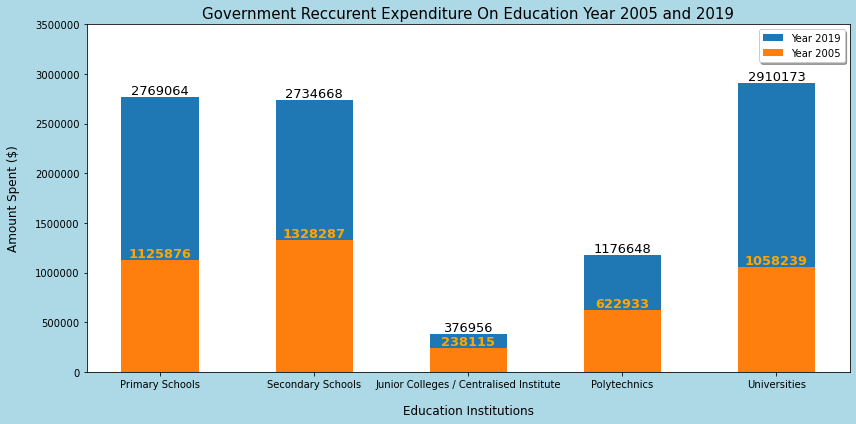

In [4]:
#Bar chart on Government recurrent expenditure on education
data = np.genfromtxt ('./Datasets/government-recurrent-expenditure-on-education-by-type-of-educational-institutions.csv', dtype=[('year','i8'),('type_of_educational_institutions','U50'),('recurrent_expenditure','i8')], delimiter=",", names=True)


#Extract Year 2005 and Year 2019 Rows
data2005 = data[data['year'] == 2005]
data2019 = data[data['year'] == 2019]

data2005_final = data2005[np.isin(data2005['type_of_educational_institutions'],['Universities','Junior Colleges / Centralised Institute', 'Polytechnics', 'Secondary Schools', 'Primary Schools'])]
data2019_final = data2019[np.isin(data2019['type_of_educational_institutions'],['Universities','Junior Colleges / Centralised Institute', 'Polytechnics', 'Secondary Schools', 'Primary Schools'])]

#x_axis
x_axis = data2005_final['type_of_educational_institutions']

data2005_values = []
data2019_values = []
for value2005 in data2005_final:
    value2005 = value2005['recurrent_expenditure']
    data2005_values.append(value2005)
    
for value2019 in data2019_final:
    value2019 = value2019['recurrent_expenditure']
    data2019_values.append(value2019)


#Plotting
fig = plt.figure(figsize=(12,6))
fig.set_facecolor("lightblue")
ax1 = fig.add_subplot()
ax1.set_title("Government Reccurent Expenditure On Education Year 2005 and 2019",fontsize=15)
ax1.set_xlabel("Education Institutions",fontsize=12, labelpad=15)
ax1.set_ylabel("Amount Spent ($)",fontsize=12, labelpad=15)
ax1.set_ylim(0,3500000)
ax1.bar(np.arange(5),data2019_values, width = 0.5, label = "Year 2019")
ax1.bar(np.arange(5),data2005_values, width = 0.5, label = "Year 2005")
ax1.set_xticks(np.arange(5),x_axis)
legend = ax1.legend(shadow=True)

for i in range(len(data2019_values)):
    plt.text(i, data2019_values[i], data2019_values[i], ha = 'center',va="bottom",fontsize=13)
    
for i in range(len(data2005_values)):
    plt.text(i, data2005_values[i], data2005_values[i], ha = 'center', va="bottom",weight="bold",fontsize=13, color="orange")

plt.ticklabel_format(axis="y", style="plain")
plt.tight_layout()
plt.show()


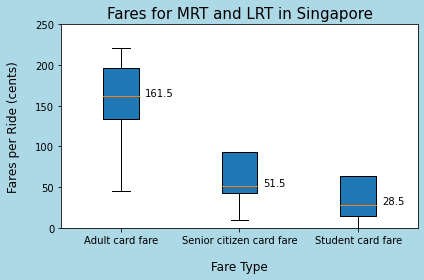

In [5]:
#Box plot on fares for MRT and LRT in Singapore
data = np.genfromtxt ('./Datasets/fares-for-mrt-and-lrt-effective-from-26-december-2021.csv', dtype=[('fare_type','U50'),('applicable_time','U50'),('distance','U50'),('fare_per_ride', 'i8')], delimiter=",", names=True)


#Extracting adult,student and senior rows
dataRows = data[np.isin(data['fare_type'],['Adult card fare','Student card fare','Senior citizen card fare'])]

dataAdult = dataRows[dataRows['fare_type'] == "Adult card fare"]
dataStudent = dataRows[dataRows['fare_type'] == "Student card fare"]
dataSenior = dataRows[dataRows['fare_type'] == "Senior citizen card fare"]

#x_axis
x_axis = np.unique(dataRows['fare_type'])

#Extract All the fare per ride 
adult_values = dataAdult['fare_per_ride']
student_values = dataStudent['fare_per_ride']
senior_values = dataSenior['fare_per_ride']

#Plotting
fig, ax1 = plt.subplots()
fig.set_facecolor("lightblue")
ax1.set_title("Fares for MRT and LRT in Singapore",fontsize=15)
ax1.set_xlabel("Fare Type",fontsize=12, labelpad=15)
ax1.set_ylabel("Fares per Ride (cents)",fontsize=12, labelpad=15)
ax1.set_ylim(0,250)
bplot = plt.boxplot((adult_values, senior_values,student_values),labels = x_axis, patch_artist = True)

for line in bplot['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x+0.05, y, f'{y}')
plt.tight_layout()
plt.show()


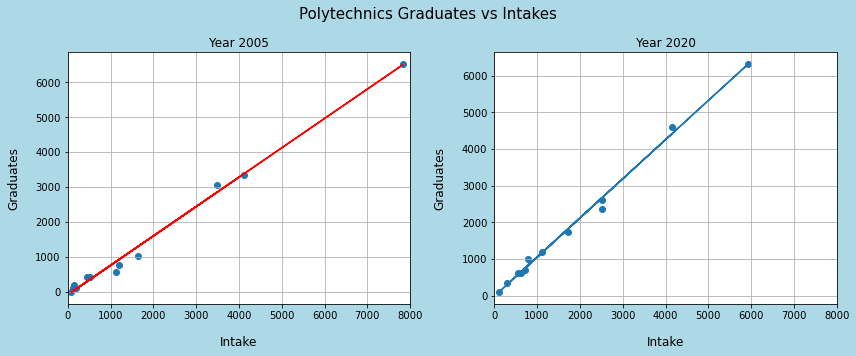

In [6]:
#Scatterplot on Polytechnic Graduates vs Intakes
data = np.genfromtxt(("\t".join(i) for i in csv.reader(open('./Datasets/polytechnics-intake-enrolment-and-graduates-by-course.csv'))), delimiter="\t", dtype=[('year','i8'),('sex','U50'),('course','U50'),('intake','i4'),('enrolment','i8'),('graduates','i8')], names=True)

#Obtain rows with year 2005 and 2020
data2005 = data[data['year'] == 2005]
data2020 = data[data['year'] == 2020]

#Obtain only the rows needed that have sex (MF) 
data2005_final = data2005[np.isin(data2005['sex'],['MF'])]
data2020_final = data2020[np.isin(data2020['sex'],['MF'])]


#Obtain the x and y values for both years
yValues_2005 = data2005_final['graduates']
xValues_2005 = data2005_final['intake']

yValues_2020 = data2020_final['graduates']
xValues_2020 = data2020_final['intake']

#Plotting the graph
fig = plt.figure(figsize = (12,5))
fig.set_facecolor("lightblue")
fig.suptitle("Polytechnics Graduates vs Intakes", fontsize = 15)

#1st Column
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Year 2005",fontsize=12)
ax1.set_xlabel("Intake",fontsize=12, labelpad=15)
ax1.set_ylabel("Graduates",fontsize=12, labelpad=15)
ax1.set_xlim(0,8000)

plt.scatter(xValues_2005,yValues_2005)
m,b = np.polyfit(xValues_2005,yValues_2005,1)
plt.grid()
plt.plot(xValues_2005, m*xValues_2005 + b, "r-")

#2nd Column
ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Year 2020",fontsize=12)
ax2.set_xlabel("Intake",fontsize=12,labelpad=15)
ax2.set_ylabel("Graduates",fontsize=12,labelpad=15)
ax2.set_xlim(0,8000)

plt.scatter(xValues_2020,yValues_2020)
m,b = np.polyfit(xValues_2020,yValues_2020,deg=1) 
plt.plot(xValues_2020, m*xValues_2020 + b)
plt.tight_layout()
plt.grid()
plt.show()

### Text Analysis On Datasets used

In [7]:
data = np.genfromtxt ('./Datasets/literacy-rate-annual.csv', dtype=[('year','i4'),('level_1','U50'),('value','f8')], delimiter=",", names=True)
print("***Literacy Rate Annual Dataset***")
print(f"Number Of Columns: {len(data['year'])}")
print()
print("The names of the columns are: ")
print(f"year: {data['year'].dtype}")
print(f"level_1: {data['level_1'].dtype}")
print(f"value: {data['value'].dtype}")
print()
print(f"{len(np.unique(data['year']))} unique values in year column")
print(f"{len(np.unique(data['level_1']))} unique values in level_1 column")
print(f"{len(np.unique(data['value']))} unique values in value column")




***Literacy Rate Annual Dataset***
Number Of Columns: 60

The names of the columns are: 
year: int32
level_1: <U50
value: float64

60 unique values in year column
1 unique values in level_1 column
60 unique values in value column


In [8]:
data = np.genfromtxt ('./Datasets/singapore-residents-aged-25-years-over-by-hqa-and-sex-annual.csv', dtype=[('year','i4'),('level_1','U50'),('value','i8')], delimiter=",", names=True)
print("***Highest Qualification attained Dataset***")
print(f"Number Of Columns before Cleaning: {len(data['year'])}")
#Extract rows for year 2005 and 2018
data2005 = data[data['year'] == 2005]
data2018 = data[data['year'] == 2018]
#Extract rows with required keywords only
data2005_final = data2005[np.isin(data2005['level_1'],['Total - Below Secondary','Total - Secondary','Total - Post Secondary (Non-Tertiary)', 'Total - Diploma & Professional Qualification', 'Total - University'])]
data2018_final = data2018[np.isin(data2018['level_1'],['Total - Below Secondary','Total - Secondary','Total - Post Secondary (Non-Tertiary)', 'Total - Diploma & Professional Qualification', 'Total - University'])]
print(f"Number Of Columns after Cleaning: {len(data2005_final) + len(data2018_final)}")
print()
print("The names of the columns are:")
print(f"year: {data['year'].dtype}")
print(f"level_1: {data['level_1'].dtype}")
print(f"value: {data['value'].dtype}")
print()
print(f"{len(np.unique(data['year']))} unique values in year column")
print(f"{len(np.unique(data['level_1']))} unique values in level_1 column")
print(f"{len(np.unique(data['value']))} unique values in value column")

***Highest Qualification attained Dataset***
Number Of Columns before Cleaning: 522
Number Of Columns after Cleaning: 10

The names of the columns are:
year: int32
level_1: <U50
value: int64

29 unique values in year column
18 unique values in level_1 column
508 unique values in value column


In [9]:
data = np.genfromtxt ('./Datasets/government-recurrent-expenditure-on-education-by-type-of-educational-institutions.csv', dtype=[('year','i8'),('type_of_educational_institutions','U50'),('recurrent_expenditure','i8')], delimiter=",", names=True)
print("***Government Recurrent Expenditure on education by type of educational institution Dataset***")
print(f"Number Of Columns before Cleaning: {len(data['year'])}")
#Extract Year 2005 and Year 2019 Rows
data2005 = data[data['year'] == 2005]
data2019 = data[data['year'] == 2019]

data2005_final = data2005[np.isin(data2005['type_of_educational_institutions'],['Universities','Junior Colleges / Centralised Institute', 'Polytechnics', 'Secondary Schools', 'Primary Schools'])]
data2019_final = data2019[np.isin(data2019['type_of_educational_institutions'],['Universities','Junior Colleges / Centralised Institute', 'Polytechnics', 'Secondary Schools', 'Primary Schools'])]
print(f"Number Of Columns after Cleaning: {len(data2005_final) + len(data2018_final)}")
print()
print("The names of the columns are: ")
print(f"year: {data['year'].dtype}")
print(f"type_of_educational_institutions: {data['type_of_educational_institutions'].dtype}")
print(f"recurrent_expenditure: {data['recurrent_expenditure'].dtype}")
print()
print(f"{len(np.unique(data['year']))} unique values in year column")
print(f"{len(np.unique(data['type_of_educational_institutions']))} unique values in type_of_educational_institutions column")
print(f"{len(np.unique(data['recurrent_expenditure']))} unique values in recurrent_expenditure column")

***Government Recurrent Expenditure on education by type of educational institution Dataset***
Number Of Columns before Cleaning: 273
Number Of Columns after Cleaning: 10

The names of the columns are: 
year: int64
type_of_educational_institutions: <U50
recurrent_expenditure: int64

39 unique values in year column
7 unique values in type_of_educational_institutions column
273 unique values in recurrent_expenditure column


In [10]:
data = np.genfromtxt ('./Datasets/fares-for-mrt-and-lrt-effective-from-26-december-2021.csv', dtype=[('fare_type','U50'),('applicable_time','U50'),('distance','U50'),('fare_per_ride', 'i8')], delimiter=",", names=True)
print("*** MRT and LRT Fares Dataset ***")
print(f"Number Of Columns before Cleaning: {len(data['fare_type'])}")

#Extracting adult,student and senior rows
dataRows = data[np.isin(data['fare_type'],['Adult card fare','Student card fare','Senior citizen card fare'])]

dataAdult = dataRows[dataRows['fare_type'] == "Adult card fare"]
dataStudent = dataRows[dataRows['fare_type'] == "Student card fare"]
dataSenior = dataRows[dataRows['fare_type'] == "Senior citizen card fare"]
print(f"Number Of Columns after Cleaning: {len(dataAdult) + len(dataStudent) + len(dataSenior)}")
print()
print("The names of the columns are: ")
print(f"fare_type: {data['fare_type'].dtype}")
print(f"applicable_time: {data['applicable_time'].dtype}")
print(f"distance: {data['distance'].dtype}")
print(f"fare_per_ride: {data['fare_per_ride'].dtype}")
print()
print(f"{len(np.unique(data['fare_type']))} unique values in fare_type column")
print(f"{len(np.unique(data['applicable_time']))} unique values in applicable_time column")
print(f"{len(np.unique(data['distance']))} unique values in distance column")
print(f"{len(np.unique(data['fare_per_ride']))} unique values in fare_per_ride column")

*** MRT and LRT Fares Dataset ***
Number Of Columns before Cleaning: 429
Number Of Columns after Cleaning: 234

The names of the columns are: 
fare_type: <U50
applicable_time: <U50
distance: <U50
fare_per_ride: int64

6 unique values in fare_type column
3 unique values in applicable_time column
39 unique values in distance column
140 unique values in fare_per_ride column


In [11]:
data = np.genfromtxt(("\t".join(i) for i in csv.reader(open('./Datasets/polytechnics-intake-enrolment-and-graduates-by-course.csv'))), delimiter="\t", dtype=[('year','i8'),('sex','U50'),('course','U50'),('intake','i4'),('enrolment','i8'),('graduates','i8')], names=True)
print("*** Polytechnic intake Dataset ***")
print(f"Number Of Columns before Cleaning: {len(data['year'])}")
#Obtain rows with year 2005 and 2020
data2005 = data[data['year'] == 2005]
data2020 = data[data['year'] == 2020]

#Obtain only the rows needed that have sex (MF) 
data2005_final = data2005[np.isin(data2005['sex'],['MF'])]
data2020_final = data2020[np.isin(data2020['sex'],['MF'])]

print(f"Number Of Columns after Cleaning: {len(data2005_final) + len(data2020_final)}")
print()
print("The names of the columns are: ")
print(f"year: {data['year'].dtype}")
print(f"sex: {data['sex'].dtype}")
print(f"course: {data['course'].dtype}")
print(f"intake: {data['intake'].dtype}")
print(f"enrolment: {data['enrolment'].dtype}")
print(f"graduates: {data['graduates'].dtype}")
print()
print(f"{len(np.unique(data['year']))} unique values in year column")
print(f"{len(np.unique(data['sex']))} unique values in sex column")
print(f"{len(np.unique(data['course']))} unique values in course column")
print(f"{len(np.unique(data['intake']))} unique values in intake column")
print(f"{len(np.unique(data['enrolment']))} unique values in enrolment column")
print(f"{len(np.unique(data['graduates']))} unique values in graduates column")

*** Polytechnic intake Dataset ***
Number Of Columns before Cleaning: 384
Number Of Columns after Cleaning: 24

The names of the columns are: 
year: int64
sex: <U50
course: <U50
intake: int32
enrolment: int64
graduates: int64

16 unique values in year column
2 unique values in sex column
13 unique values in course column
338 unique values in intake column
352 unique values in enrolment column
337 unique values in graduates column
